# Data Description

The datasets/ directory contains fifty CSV files (one per week) of timestamped sales data. Each row in a file has two columns:

- sale_time - The timestamp on which the sale was made e.g. 2012-10-01 01:42:22
- purchaser_gender - The gender of the person who purchased (male or female)


# Assignment
Please answer the questions below based on the data provided:
1. Plot daily sales for all 50 weeks.

2. It looks like there has been a sudden change in daily sales. What date did it occur?

3. Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

4. Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

5. Assume a given day is divided into four dayparts:
- night (12:00AM - 6:00AM),
- morning (6:00AM - 12:00PM),
- afternoon (12:00PM - 6:00PM),
- evening (6:00PM - 12:00AM).

What is the percentage of sales in each daypart over all 50 weeks?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
# get all filenames under the data directory
%cd "C:\Users\quynh\OneDrive\Documents\Python Course\Exercise\Sales Analyst Exe\datasets"


C:\Users\quynh\OneDrive\Documents\Python Course\Exercise\Sales Analyst Exe\datasets


C:\Users\quynh\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
l = [pd.read_csv(filename) for filename in glob.glob("*.csv")]

In [5]:
print(len(l))

50


In [6]:
df = pd.concat(l, axis = 0)

In [7]:
df.head()

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204329 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [9]:
# 1. Plot daily sales for all 50 weeks.

In [10]:
sale_day = pd.to_datetime(df['sale_time'])

In [11]:
sale_day

0      2012-10-01 01:42:22
1      2012-10-01 02:24:53
2      2012-10-01 02:25:40
3      2012-10-01 02:30:42
4      2012-10-01 02:51:32
               ...        
4994   2013-09-15 23:30:51
4995   2013-09-15 23:42:02
4996   2013-09-15 23:43:24
4997   2013-09-15 23:43:32
4998   2013-09-15 23:48:47
Name: sale_time, Length: 204329, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204329 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [13]:
daily_sales_df = sale_day.groupby(sale_day.dt.floor('d')).count().reset_index(name='sales_amount')
daily_sales_df.rename(columns={'sale_time':'sale_day'},inplace=True)
daily_sales_df

,sale_day,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476
...,...,...
345,2013-09-11,719
346,2013-09-12,735
347,2013-09-13,743
348,2013-09-14,655


In [14]:
daily_sales_df.index = daily_sales_df['sale_day']
daily_sales_df.index

DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-06', '2012-10-07', '2012-10-08',
               '2012-10-09', '2012-10-10',
               ...
               '2013-09-06', '2013-09-07', '2013-09-08', '2013-09-09',
               '2013-09-10', '2013-09-11', '2013-09-12', '2013-09-13',
               '2013-09-14', '2013-09-15'],
              dtype='datetime64[ns]', name='sale_day', length=350, freq=None)

In [15]:
daily_sales_df.drop(columns=['sale_day'], inplace=True)

In [16]:
daily_sales_df.head()

,sales_amount
sale_day,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476


<Axes: title={'center': 'Daily sales over 50 weeks'}, xlabel='sale_day'>

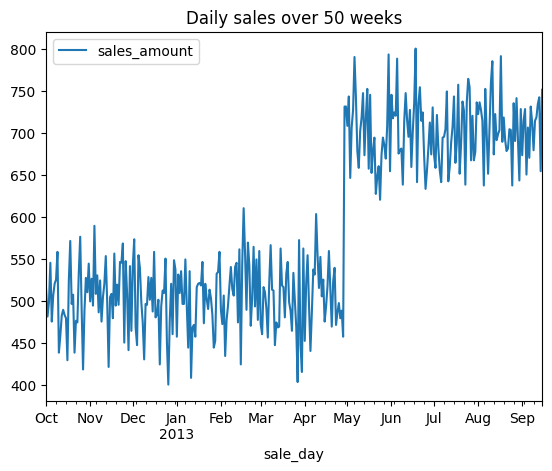

In [17]:
#Plot daily sales for all 50 weeks.
daily_sales_df.plot(title="Daily sales over 50 weeks")

In [18]:
#2. It looks like there has been a sudden change in daily sales. What date did it occur?

In [19]:
daily_sales_df['pre_day_sale_amount'] = [None] + daily_sales_df['sales_amount'].to_list()[:-1]

In [20]:
daily_sales_df

,sales_amount,pre_day_sale_amount
sale_day,,
2012-10-01,514,NaN
2012-10-02,482,514.0
2012-10-03,499,482.0
2012-10-04,546,499.0
2012-10-05,476,546.0
...,...,...
2013-09-11,719,715.0
2013-09-12,735,719.0
2013-09-13,743,735.0


In [21]:
daily_sales_df['Difference'] = daily_sales_df['sales_amount'] - daily_sales_df['pre_day_sale_amount']

In [22]:
daily_sales_df

,sales_amount,pre_day_sale_amount,Difference
sale_day,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0
...,...,...,...
2013-09-11,719,715.0,4.0
2013-09-12,735,719.0,16.0
2013-09-13,743,735.0,8.0


In [23]:
#Method 1:
abs(daily_sales_df['Difference']).sort_values(ascending=False).head(1)


sale_day
2013-04-29    274.0
Name: Difference, dtype: float64

In [24]:
#Method 2:
Max_difference = daily_sales_df['Difference'].idxmax()
Max_difference

Timestamp('2013-04-29 00:00:00')

In [25]:
max_change_row = daily_sales_df.loc[Max_difference]
max_change_row

sales_amount           732.0
pre_day_sale_amount    458.0
Difference             274.0
Name: 2013-04-29 00:00:00, dtype: float64

In [26]:
#3. Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?
from scipy import stats

# 3 loại kiểm định
1. One-sample t-test(kiem dinh t mot mau) -> so sanh trung binh cua mot mau du lieu voi 1 gia tri trung binh cu the
2. Indepent samples t-test (2 mau doc lap)
3. Z - test
4. Chi-Square
5. Pearson
6. ANOVA

In [27]:
#first drop all nan values (if any) for test
daily_sales_df.dropna(inplace=True)
daily_sales_df

,sales_amount,pre_day_sale_amount,Difference
sale_day,,,
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0
2012-10-06,507,476.0,31.0
...,...,...,...
2013-09-11,719,715.0,4.0
2013-09-12,735,719.0,16.0
2013-09-13,743,735.0,8.0


In [28]:
# in this case, using t-test is suitable
stats.ttest_1samp(daily_sales_df['sales_amount'],732)

TtestResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84, df=348)

In [29]:
#statistic = -26.273266340051002
# pvalue=1.3019593251472396e-84
# danh gia p-value thap hon nguong 0.05 cho thay su thay doi la co y nghia trong thong ke 

In [30]:
#4. Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? 
# Please use plots to support your answer (a rigorous statistical analysis is not necessary).

In [32]:
df['sale_day']=pd.to_datetime(df['sale_time'].dt.floor('d'))

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df

,sale_time,purchaser_gender,sale_day
0,2012-10-01 01:42:22,female,2012-10-01
1,2012-10-01 02:24:53,female,2012-10-01
2,2012-10-01 02:25:40,female,2012-10-01
3,2012-10-01 02:30:42,female,2012-10-01
4,2012-10-01 02:51:32,male,2012-10-01
...,...,...,...
4994,2013-09-15 23:30:51,female,2013-09-15
4995,2013-09-15 23:42:02,female,2013-09-15
4996,2013-09-15 23:43:24,male,2013-09-15
4997,2013-09-15 23:43:32,male,2013-09-15


In [ ]:
df

,sale_time,purchaser_gender,sale_day
0,2012-10-01 01:42:22,female,2012-10-01
1,2012-10-01 02:24:53,female,2012-10-01
2,2012-10-01 02:25:40,female,2012-10-01
3,2012-10-01 02:30:42,female,2012-10-01
4,2012-10-01 02:51:32,male,2012-10-01
...,...,...,...
4994,2013-09-15 23:30:51,female,2013-09-15
4995,2013-09-15 23:42:02,female,2013-09-15
4996,2013-09-15 23:43:24,male,2013-09-15
4997,2013-09-15 23:43:32,male,2013-09-15


In [ ]:
gender_portion_df = df.groupby(['sale_day','purchaser_gender']).size().reset_index(name='sale_amount')
gender_portion_df

,sale_day,purchaser_gender,sale_amount
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


In [ ]:
summary = pd.DataFrame(gender_portion_df['sale_day'].unique(),columns=['sale_day'])

In [ ]:
summary['sales_by_male'] = pd.Series(gender_portion_df[gender_portion_df.purchaser_gender == 'male']['sale_amount']).reset_index(drop=True)
summary['sales_by_female'] = pd.Series(gender_portion_df[gender_portion_df.purchaser_gender == 'female']['sale_amount']).reset_index(drop=True)

In [ ]:
summary

,sale_day,sales_by_male,sales_by_female
0,2012-10-01,101,413
1,2012-10-02,103,379
2,2012-10-03,113,386
3,2012-10-04,114,432
4,2012-10-05,108,368
...,...,...,...
345,2013-09-11,495,224
346,2013-09-12,510,225
347,2013-09-13,537,206
348,2013-09-14,462,193


In [ ]:
summary['gender_ratio'] = summary['sales_by_male']/summary['sales_by_female']

In [ ]:
summary

,sale_day,sales_by_male,sales_by_female,gender_ratio
0,2012-10-01,101,413,0.244552
1,2012-10-02,103,379,0.271768
2,2012-10-03,113,386,0.292746
3,2012-10-04,114,432,0.263889
4,2012-10-05,108,368,0.293478
...,...,...,...,...
345,2013-09-11,495,224,2.209821
346,2013-09-12,510,225,2.266667
347,2013-09-13,537,206,2.606796
348,2013-09-14,462,193,2.393782


In [ ]:
plot_df = summary.copy()

In [ ]:
plot_df['total_sale_amount'] = plot_df['sales_by_female'] + plot_df['sales_by_male']

In [ ]:
plot_df

,sale_day,sales_by_male,sales_by_female,gender_ratio,total_sale_amount
0,2012-10-01,101,413,0.244552,514
1,2012-10-02,103,379,0.271768,482
2,2012-10-03,113,386,0.292746,499
3,2012-10-04,114,432,0.263889,546
4,2012-10-05,108,368,0.293478,476
...,...,...,...,...,...
345,2013-09-11,495,224,2.209821,719
346,2013-09-12,510,225,2.266667,735
347,2013-09-13,537,206,2.606796,743
348,2013-09-14,462,193,2.393782,655


In [ ]:
plot_df.drop(columns=['sales_by_female','sales_by_male'],inplace=True)

In [ ]:
plot_df

,sale_day,gender_ratio,total_sale_amount
0,2012-10-01,0.244552,514
1,2012-10-02,0.271768,482
2,2012-10-03,0.292746,499
3,2012-10-04,0.263889,546
4,2012-10-05,0.293478,476
...,...,...,...
345,2013-09-11,2.209821,719
346,2013-09-12,2.266667,735
347,2013-09-13,2.606796,743
348,2013-09-14,2.393782,655


In [ ]:
plot_df.index = plot_df['sale_day']
plot_df

,sale_day,gender_ratio,total_sale_amount
sale_day,,,
2012-10-01,2012-10-01,0.244552,514
2012-10-02,2012-10-02,0.271768,482
2012-10-03,2012-10-03,0.292746,499
2012-10-04,2012-10-04,0.263889,546
2012-10-05,2012-10-05,0.293478,476
...,...,...,...
2013-09-11,2013-09-11,2.209821,719
2013-09-12,2013-09-12,2.266667,735
2013-09-13,2013-09-13,2.606796,743


In [ ]:
plot_df.drop(columns=['sale_day'],inplace=True)


In [ ]:
plot_df

,gender_ratio,total_sale_amount
sale_day,,
2012-10-01,0.244552,514
2012-10-02,0.271768,482
2012-10-03,0.292746,499
2012-10-04,0.263889,546
2012-10-05,0.293478,476
...,...,...
2013-09-11,2.209821,719
2013-09-12,2.266667,735
2013-09-13,2.606796,743


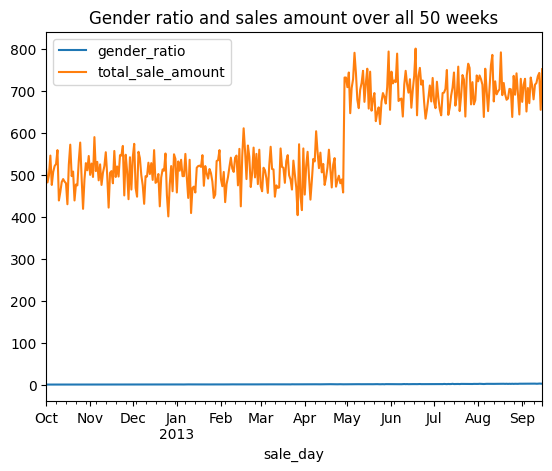

In [ ]:
plot_df.plot(title="Gender ratio and sales amount over all 50 weeks")
plt.show()

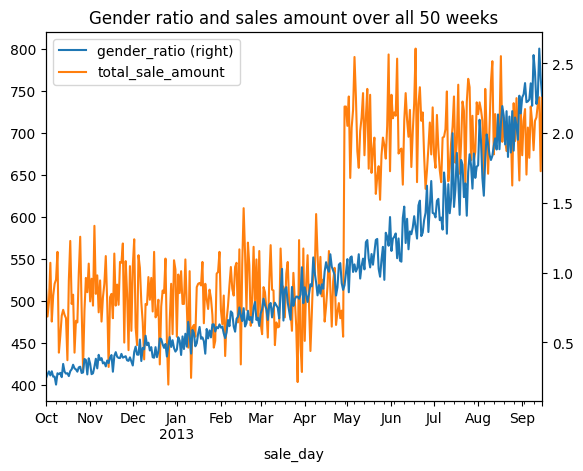

In [ ]:
plot_df.plot(secondary_y=['gender_ratio'],title="Gender ratio and sales amount over all 50 weeks")
plt.show()

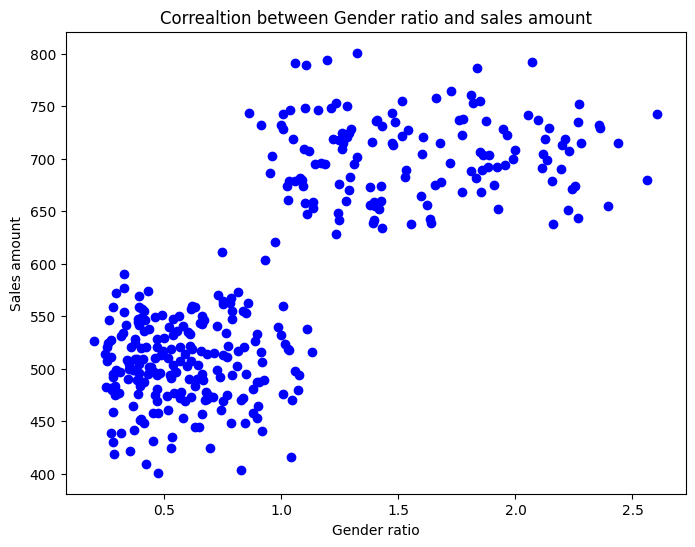

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(plot_df['gender_ratio'],plot_df['total_sale_amount'],c='blue', label='Data Points')
plt.xlabel('Gender ratio')
plt.ylabel('Sales amount')
plt.title('Correaltion between Gender ratio and sales amount')
plt.show()

In [ ]:
#5. Assume a given day is divided into four dayparts:
#- night (12:00AM - 6:00AM),
#- morning (6:00AM - 12:00PM),
#- afternoon (12:00PM - 6:00PM),
#- evening (6:00PM - 12:00AM).

In [ ]:
#What is the percentage of sales in each daypart over all 50 weeks?

In [33]:
df1 = df.copy()

In [34]:
df1[['sale_day','day_time']] = df1['sale_time'].str.split(' ',expand=True)

In [35]:
df1

,sale_time,purchaser_gender,sale_day,day_time
0,2012-10-01 01:42:22,female,2012-10-01,01:42:22
1,2012-10-01 02:24:53,female,2012-10-01,02:24:53
2,2012-10-01 02:25:40,female,2012-10-01,02:25:40
3,2012-10-01 02:30:42,female,2012-10-01,02:30:42
4,2012-10-01 02:51:32,male,2012-10-01,02:51:32
...,...,...,...,...
4994,2013-09-15 23:30:51,female,2013-09-15,23:30:51
4995,2013-09-15 23:42:02,female,2013-09-15,23:42:02
4996,2013-09-15 23:43:24,male,2013-09-15,23:43:24
4997,2013-09-15 23:43:32,male,2013-09-15,23:43:32


In [36]:
df1['sale_day'] = pd.to_datetime(df1['sale_day'])

In [37]:
df1['day_time'] = pd.to_datetime(df1['day_time'])

C:\Users\quynh\AppData\Local\Temp\ipykernel_26860\500295838.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['day_time'] = pd.to_datetime(df1['day_time'])


In [38]:
df1

,sale_time,purchaser_gender,sale_day,day_time
0,2012-10-01 01:42:22,female,2012-10-01,2024-06-07 01:42:22
1,2012-10-01 02:24:53,female,2012-10-01,2024-06-07 02:24:53
2,2012-10-01 02:25:40,female,2012-10-01,2024-06-07 02:25:40
3,2012-10-01 02:30:42,female,2012-10-01,2024-06-07 02:30:42
4,2012-10-01 02:51:32,male,2012-10-01,2024-06-07 02:51:32
...,...,...,...,...
4994,2013-09-15 23:30:51,female,2013-09-15,2024-06-07 23:30:51
4995,2013-09-15 23:42:02,female,2013-09-15,2024-06-07 23:42:02
4996,2013-09-15 23:43:24,male,2013-09-15,2024-06-07 23:43:24
4997,2013-09-15 23:43:32,male,2013-09-15,2024-06-07 23:43:32


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204329 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_time         204329 non-null  object        
 1   purchaser_gender  204329 non-null  object        
 2   sale_day          204329 non-null  datetime64[ns]
 3   day_time          204329 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 7.8+ MB


In [40]:
def classify_time(x):
    if 0 <= x.hour < 6:
        return "night"
    elif 6 <= x.hour < 12:
        return "morning"
    elif 12 <= x.hour < 18:
        return "afternoon"
    else:
        return "evening"

In [41]:
df1['day_part'] = df1['day_time'].apply(classify_time)

In [42]:
df1.drop(columns=['day_time','sale_time'])

,purchaser_gender,sale_day,day_part
0,female,2012-10-01,night
1,female,2012-10-01,night
2,female,2012-10-01,night
3,female,2012-10-01,night
4,male,2012-10-01,night
...,...,...,...
4994,female,2013-09-15,evening
4995,female,2013-09-15,evening
4996,male,2013-09-15,evening
4997,male,2013-09-15,evening


In [43]:
new_df = df1.groupby(['sale_day','day_part']).size().reset_index(name='sales_amount')

In [44]:
new_df

,sale_day,day_part,sales_amount
0,2012-10-01,afternoon,202
1,2012-10-01,evening,113
2,2012-10-01,morning,155
3,2012-10-01,night,44
4,2012-10-02,afternoon,202
...,...,...,...
1395,2013-09-14,night,52
1396,2013-09-15,afternoon,307
1397,2013-09-15,evening,155
1398,2013-09-15,morning,226


In [45]:
new_df1 = pd.DataFrame(new_df['sale_day'].unique(),columns=['sale_day'])

In [46]:
new_df1['sales_morning'] = pd.Series(new_df[new_df.day_part == 'morning']['sales_amount']).reset_index(drop=True)
new_df1['sales_afternoon'] = pd.Series(new_df[new_df.day_part == 'afternoon']['sales_amount']).reset_index(drop=True)
new_df1['sales_evening'] = pd.Series(new_df[new_df.day_part == 'evening']['sales_amount']).reset_index(drop=True)
new_df1['sales_night'] = pd.Series(new_df[new_df.day_part == 'night']['sales_amount']).reset_index(drop=True)

In [47]:
new_df1['total_sales'] = new_df1['sales_morning'] + new_df1['sales_afternoon'] + new_df1['sales_evening'] + new_df1['sales_night']
new_df1

,sale_day,sales_morning,sales_afternoon,sales_evening,sales_night,total_sales
0,2012-10-01,155,202,113,44,514
1,2012-10-02,136,202,98,46,482
2,2012-10-03,170,179,108,42,499
3,2012-10-04,164,214,122,46,546
4,2012-10-05,156,181,86,53,476
...,...,...,...,...,...,...
345,2013-09-11,212,281,164,62,719
346,2013-09-12,212,294,162,67,735
347,2013-09-13,246,274,165,58,743
348,2013-09-14,210,269,124,52,655


In [48]:
day_part = ['sales_morning','sales_afternoon','sales_evening','sales_night']
for col in day_part:
    new_df1[col] = ((new_df1[col]*100)/new_df1['total_sales']).round(2)
    new_df1[col] = new_df1[col].astype(str) + '%'

In [49]:
new_df1

,sale_day,sales_morning,sales_afternoon,sales_evening,sales_night,total_sales
0,2012-10-01,30.16%,39.3%,21.98%,8.56%,514
1,2012-10-02,28.22%,41.91%,20.33%,9.54%,482
2,2012-10-03,34.07%,35.87%,21.64%,8.42%,499
3,2012-10-04,30.04%,39.19%,22.34%,8.42%,546
4,2012-10-05,32.77%,38.03%,18.07%,11.13%,476
...,...,...,...,...,...,...
345,2013-09-11,29.49%,39.08%,22.81%,8.62%,719
346,2013-09-12,28.84%,40.0%,22.04%,9.12%,735
347,2013-09-13,33.11%,36.88%,22.21%,7.81%,743
348,2013-09-14,32.06%,41.07%,18.93%,7.94%,655


In [50]:
df2 = df1.groupby(['day_part']).size().reset_index(name='sales_amount')

In [54]:
df2

,day_part,sales_amount
0,afternoon,80533
1,evening,42620
2,morning,62870
3,night,18306


In [55]:
df2['sales_amount'].sum()

204329

In [62]:
df2['percentage_sales'] = ((df2['sales_amount']*100)/df2['sales_amount'].sum()).round(2)
df2['percentage_sales'] = df2['percentage_sales'].astype(str) +'%'

In [63]:
df2

,day_part,sales_amount,percentage_sales
0,afternoon,80533,39.41%
1,evening,42620,20.86%
2,morning,62870,30.77%
3,night,18306,8.96%
